<a href="https://colab.research.google.com/github/LucasSFlores80/Data-Science-I/blob/main/An%C3%A1lisis_de_casos_de_decesos_por_diferentes_factores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero se cargan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np

Se carga el dataset teniendo en cuenta que se trata de un archivo con extensión .csv.

Fuente del dataset: https://www.kaggle.com/datasets/muhammadumairab/number-of-deaths-by-risk-factor

Como índice principal del dataset se toma el nombre de país (index_col=0)


In [3]:
url = 'https://raw.githubusercontent.com/LucasSFlores80/Data-Science-I/main/number-of-deaths-by-risk-factor.csv'
riesgo = pd.read_csv(url,index_col=0)
riesgo

,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,4794,...,9518,2798,4825,174,389,2016,7686,107,2216,564
Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,4921,...,9489,3254,5127,188,389,2056,7886,121,2501,611
Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,5279,...,9528,4042,5889,211,393,2100,8568,150,3053,700
Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,5734,...,9611,5392,7007,232,411,2316,9875,204,3726,773
Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,6050,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,1614,...,5636,2879,4328,1068,407,138,730,21,734,282
Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,1625,...,5849,2798,4295,1042,415,101,674,20,700,275
Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,1625,...,6047,2744,4251,1007,424,82,629,19,678,267


Se observa que el dataset consta de 30 columnas y 6480 filas. La información que brinda el dataset es la cantidad de decesos por tipo de riesgo en distintos países y regiones en un intervalo de años (1990-2019).

Analizo las columnas del dataset para conocer que información brinda cada una. Muestra un código de país, el año y los diferentes riesgos en la salud.
Salvo la variable Code que es de tipo string, el resto son variables tipo número entero (int).

In [4]:
riesgo .info()

<class 'pandas.core.frame.DataFrame'>
Index: 6840 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Code                                                                                                              6150 non-null   object
 1   Year                                                                                                              6840 non-null   int64 
 2   Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)              6840 non-null   int64 
 3   Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)              6840 non-null   int64 
 4   Deaths - Cause: All causes 

El nombre o índice de las columnas de los riegos es muy extensa en todos los casos. Por lo tanto, es recomendable cambiarlos por otro tipo de nombre.

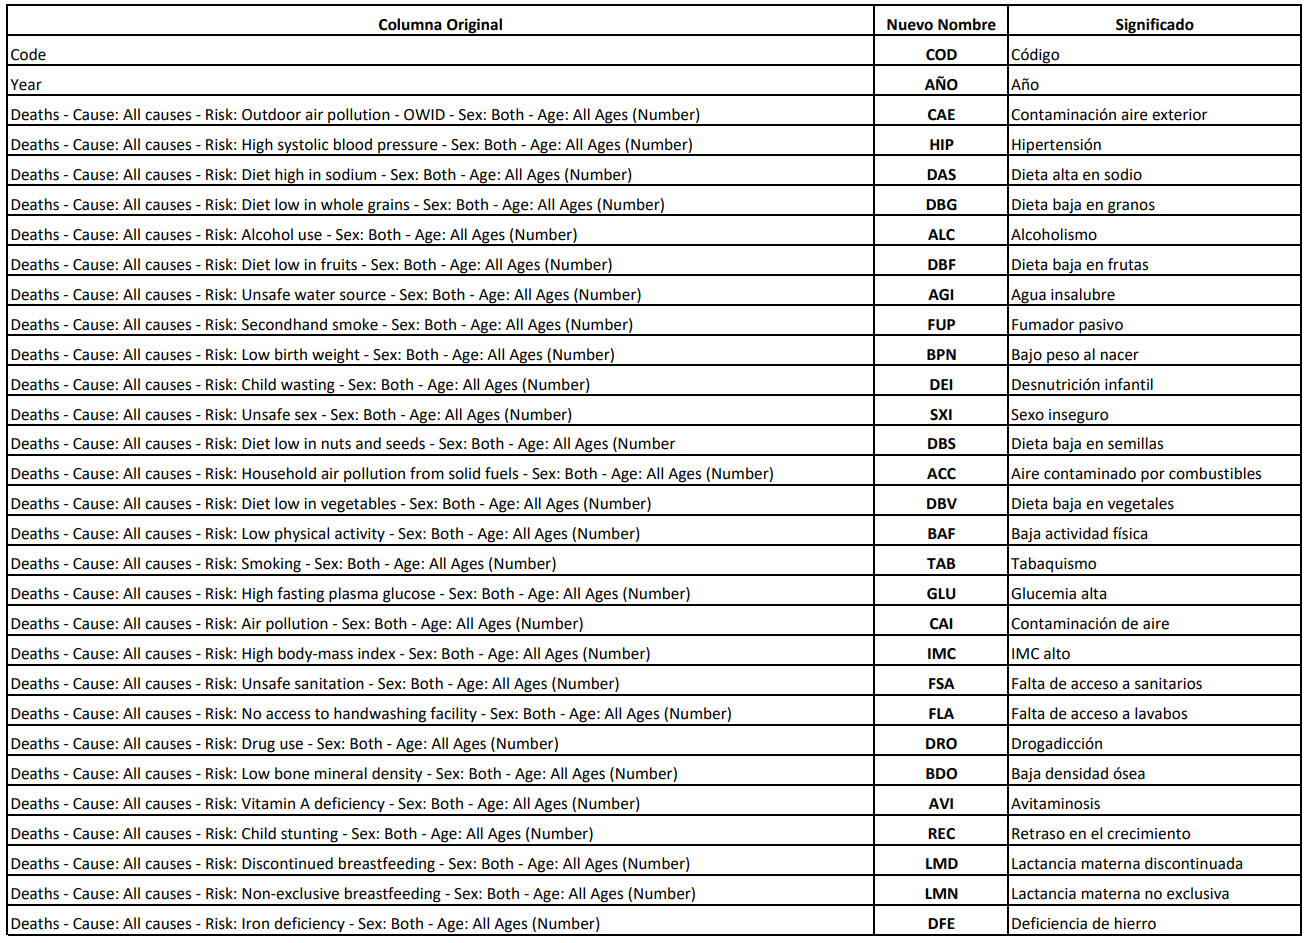

Se renombran las columnas de acuerdo a la tabla

In [5]:
riesgo_1 = riesgo.rename(columns={"Code":"COD", "Year":"AÑO","Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)":"CAE","Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)":"HIP","Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)":"DAS","Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)":"DBG","Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)":"ALC","Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)":"DBF","Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"AGI","Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)":"FUP","Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)":"BPN","Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)":"DEI","Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)":"SXI","Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)":"DBS","Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)":"ACC","Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)":"DBV","Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)":"BAF","Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)":"TAB","Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)":"GLU","Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)":"CAI","Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)":"IMC","Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)":"FSA","Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)":"FLA","Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)":"DRO","Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)":"BDO","Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)":"AVI","Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)":"REC","Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)":"LMD","Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)":"LMN","Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)":"DFE"})

Se comprueba que los cambios fueron correctos

In [6]:
riesgo_1.columns

Index(['COD', 'AÑO', 'CAE', 'HIP', 'DAS', 'DBG', 'ALC', 'DBF', 'AGI', 'FUP',
       'BPN', 'DEI', 'SXI', 'DBS', 'ACC', 'DBV', 'BAF', 'TAB', 'GLU', 'CAI',
       'IMC', 'FSA', 'FLA', 'DRO', 'BDO', 'AVI', 'REC', 'LMD', 'LMN', 'DFE'],
      dtype='object')

Se vuelve a mostrar el dataset para ver si realmente se hicieron los cambios

In [7]:
riesgo_1.head()

,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,4794,...,9518,2798,4825,174,389,2016,7686,107,2216,564
Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,4921,...,9489,3254,5127,188,389,2056,7886,121,2501,611
Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,5279,...,9528,4042,5889,211,393,2100,8568,150,3053,700
Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,5734,...,9611,5392,7007,232,411,2316,9875,204,3726,773
Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,6050,...,9675,5418,7421,247,413,2665,11031,204,3833,812


# Análisis de datos nulos
Se determina la cantidad de datos nulos y como influyen en el dataset y el análisis de las variables.

Total de datos nulos

In [8]:
riesgo_1.isnull().sum().sum()

690

Son 690 datos nulos. Se analiza en que columna están los datos nulos

In [9]:
riesgo_1.isnull().sum()

COD    690
AÑO      0
CAE      0
HIP      0
DAS      0
DBG      0
ALC      0
DBF      0
AGI      0
FUP      0
BPN      0
DEI      0
SXI      0
DBS      0
ACC      0
DBV      0
BAF      0
TAB      0
GLU      0
CAI      0
IMC      0
FSA      0
FLA      0
DRO      0
BDO      0
AVI      0
REC      0
LMD      0
LMN      0
DFE      0
dtype: int64

Se decide cambiar los datos nulos por la palabra "REGION", dado que, en un análisis visual del dataset se encuentra que los datos nulos corresponden a regiones como América Latina o los países que forman Reino Unido.

Estos datos no se borran, sino, que se agrupan para poder ser analizados y comparados con otros datos, como los países. Por ejemplo, si se toma América Latina, se puede comparar los datos de los riesgos de muerte con los países que forman la región.

In [10]:
riesgo_2 = riesgo_1.fillna('REGION')

Se comprueba si quedaron datos nulos

In [11]:
riesgo_2.isnull().sum().sum()

0

Se comprueba la no existencia de datos nulos por columna del dataset

In [12]:
riesgo_2.isnull().sum()

COD    0
AÑO    0
CAE    0
HIP    0
DAS    0
DBG    0
ALC    0
DBF    0
AGI    0
FUP    0
BPN    0
DEI    0
SXI    0
DBS    0
ACC    0
DBV    0
BAF    0
TAB    0
GLU    0
CAI    0
IMC    0
FSA    0
FLA    0
DRO    0
BDO    0
AVI    0
REC    0
LMD    0
LMN    0
DFE    0
dtype: int64

Se hace una búsqueda en el dataset utilizando como palabra clave "REGION" en la columna de COD.

In [19]:
region = riesgo_2.loc[riesgo_2['COD']=='REGION']
region

,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
Entity,,,,,,,,,,,,,,,,,,,,,
African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,53459,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,53898,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,54830,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,54977,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,55818,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World Bank Upper Middle Income,REGION,2015,1953125,4298815,1046866,711062,961051,348914,34910,562020,...,1804399,16788,37778,158483,131969,251,5176,728,9657,1985
World Bank Upper Middle Income,REGION,2016,1969630,4389967,1065553,724482,968200,350770,34179,571979,...,1860369,16072,37789,161699,135254,246,4929,681,9098,1903
World Bank Upper Middle Income,REGION,2017,1965467,4440677,1076496,733454,969102,350295,33561,578863,...,1901543,15374,36961,161312,137207,223,4508,645,8192,1811


Los cambios han sido correctos. Ahora resta saber cuales son las regiones en cuestión. Para hacer esto, se realiza una búsqueda de COD con la clave "REGION" y un solo año para poder registrar todas ellas.

In [21]:
region.loc[(region['COD']=='REGION') & (region['AÑO']==1990)]

,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
Entity,,,,,,,,,,,,,,,,,,,,,
African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,53459,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
East Asia & Pacific (WB),REGION,1990,792223,1973214,755103,210099,528615,297249,275997,523842,...,387912,206690,139031,110484,56573,21453,140216,5542,113390,8918
Eastern Mediterranean Region (WHO),REGION,1990,167123,405188,21227,102805,18994,34370,208692,79449,...,168996,156608,83308,7917,10072,27726,95377,4342,54890,6665
England,REGION,1990,36407,156715,9076,30295,6497,13775,6,12956,...,52247,1,326,1381,2186,0,7,1,30,7
Europe & Central Asia (WB),REGION,1990,622626,2384980,309584,514849,501232,193996,13647,207513,...,941856,10934,12788,42044,53416,767,11575,660,14463,761
European Region (WHO),REGION,1990,627103,2399430,312367,518009,502397,194493,13734,208726,...,947836,10984,12806,42225,53617,774,11598,669,14556,763
G20,REGION,1990,1729558,5083835,1076589,842300,1253650,608857,1174104,877675,...,1606024,892544,519419,197175,160938,60853,331514,14476,211652,39318
Latin America & Caribbean (WB),REGION,1990,105709,368306,54633,68240,143156,31306,94378,58490,...,200289,61138,44000,8813,14001,3543,22351,5334,40400,2564
Middle East & North Africa (WB),REGION,1990,140163,289453,11770,77193,9881,18177,63314,52409,...,149018,50222,24388,4073,7935,5562,29386,2025,29199,2125


Otra forma es por el método index

In [26]:
region.loc[(region['COD']=='REGION') & (region['AÑO']==1990)].index

Index(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'Latin America & Caribbean (WB)', 'Middle East & North Africa (WB)',
       'North America (WB)', 'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)', 'World Bank High Income',
       'World Bank Low Income', 'World Bank Lower Middle Income',
       'World Bank Upper Middle Income'],
      dtype='object', name='Entity')

Las Regiones son:

*   African Region (WHO)
*   East Asia & Pacific (WB)
*   Eastern Mediterranean Region (WHO)
*   England
*   Europe & Central Asia (WB)
*   European Region (WHO)
*   G20
*   Latin America & Caribbean (WB)
*   Middle East & North Africa (WB)
*   North America (WB)
*   Northern Ireland
*   OECD Countries
*   Region of the Americas (WHO)
*   Scotland
*   South Asia (WB)
*   South-East Asia Region (WHO)
*   Sub-Saharan Africa (WB)
*   Wales
*   Western Pacific Region (WHO)
*   World Bank High Income
*   World Bank Low Income
*   World Bank Lower Middle Income
*   World Bank Upper Middle Income

Finalmente, el dataset que se va a utilizar es el modificado con los índices de las columnas y los datos nulos reemplazados con la palabra "REGION".

Esto sería: **riesgo_2**

Si se quiere trabajar solamente con las regiones geográficas, se utiliza el dataset modificado con la palabra clave **region**

# Dataset riesgo_2

In [27]:
riesgo_2.head()

,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,4794,...,9518,2798,4825,174,389,2016,7686,107,2216,564
Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,4921,...,9489,3254,5127,188,389,2056,7886,121,2501,611
Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,5279,...,9528,4042,5889,211,393,2100,8568,150,3053,700
Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,5734,...,9611,5392,7007,232,411,2316,9875,204,3726,773
Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,6050,...,9675,5418,7421,247,413,2665,11031,204,3833,812


# Dataset region

In [28]:
region.head()

,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
Entity,,,,,,,,,,,,,,,,,,,,,
African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,53459,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,53898,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,54830,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,54977,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,55818,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504
